In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("scores_data.csv")
df.head(8)

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
5,AI_ELITE_7,uid_144,7 / 7
6,AI_ELITE_7,uid_143,5 / 7
7,AI_ELITE_7,uid_142,7 / 7


In [6]:
df.describe()


,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [8]:
df.columns=df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [9]:
Scores=df['Score'].apply(lambda x: x.split('/')[0])
Scores=Scores.apply(lambda x: int(x))
df['Score']=Scores

In [10]:
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4
...,...,...,...
144,AI_ELITE_4,uid_5,4
145,AI_ELITE_4,uid_4,4
146,AI_ELITE_4,uid_3,4
147,AI_ELITE_4,uid_2,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


In [12]:
print(f"max: {df['Score'].max()}")
print(f"min: {df['Score'].min()}")
print(f"mean: {df['Score'].mean()}")
print(f"mode: {df['Score'].mode()}")
print(f"median: {df['Score'].median()}")

max: 7
min: 0
mean: 4.382550335570469
mode: 0    4
Name: Score, dtype: int64
median: 4.0


In [13]:
df.groupby('Batch')['Score'].mean()

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score, dtype: float64

In [14]:
df.groupby('Batch')['Score'].var()

Batch
AI_ELITE_4    2.083333
AI_ELITE_6    2.691046
AI_ELITE_7    2.092888
Name: Score, dtype: float64

In [79]:
b_7=df[df['Batch']=="AI_ELITE_7"]
b_6=df[df['Batch']=="AI_ELITE_6"]
b_4=df[df['Batch']=="AI_ELITE_4"]

count0=b_7[(b_7["Score"]>6)]
count1=b_6[(b_6["Score"]>6)]
count2=b_4[(b_4["Score"]>6)]
# print(count)
print(f'batch 7 : {count0["Score"].agg('count')}')
print(f'batch 6 : {count1["Score"].agg('count')}')
print(f'batch 4 : {count2["Score"].agg('count')}')



# count=b_7['Score']
# val=[n for n in count if n>5]
# print(f"count of  greater than 5 are : {len(val)}")

# count=b_6['Score']
# val=[n for n in count if n>5]
# print(f"count of  greater than 5 are : {len(val)}")

# count=b_4['Score']
# val=[n for n in count if n>5]
# print(f"count of  greater than 5 are : {len(val)}")

batch 7 : 10
batch 6 : 5
batch 4 : 3


In [73]:
stats = df.groupby("Batch")["Score"].agg(
    ["count", "mean", "median", "std", "min", "max","var"]
).reset_index()

print(stats)

        Batch  count      mean  median       std  min  max       var
0  AI_ELITE_4     48  3.791667     4.0  1.443376    0    7  2.083333
1  AI_ELITE_6     48  4.229167     4.0  1.640441    0    7  2.691046
2  AI_ELITE_7     53  5.056604     5.0  1.446682    2    7  2.092888


# Key Insights
#### 1. AI_ELITE_7: The Strongest Batch
- Performance: Highest average (~5.2/7). Many students consistently scoring 6 or 7.
- Distribution: Majority are in the 5–7 range, with only a handful dipping below 3.
- Interpretation: This batch shows strong mastery and consistency. Teaching methods or peer environment here seem effective.
#### 2. AI_ELITE_6: Mixed Outcomes
- Performance: Average ~4.3/7, noticeably lower than Batch 7.
- Distribution: Some top scorers (7/7), but also several struggling at 0–2.
- Interpretation: This batch is polarized — a few excelling, but many underperforming. Suggests uneven engagement or varying preparation levels.
#### 3. AI_ELITE_4: Struggling Cohort
- Performance: Lowest average (~3.8/7).
- Distribution: Most scores cluster around 3–4, with fewer high achievers. Several at 0–2.
- Interpretation: This batch may need targeted support. The lack of strong top performers compared to other batches is concerning.

## Comparative Observations
- Consistency: Batch 7 is consistent, Batch 6 is polarized, Batch 4 is weak overall.
- High Performers: Batch 7 has the largest pool of top scorers (13 students at 7/7).
- Low Performers: Batch 4 has the highest proportion of struggling students (7 at ≤2/7).
- Median Scores: Batch 7’s median is 5, Batch 6’s is ~4–5, Batch 4’s is 4 — showing a clear downward trend.

## Actionable Insights
- For Batch 7: Maintain current strategies; perhaps challenge top performers with advanced material.
- For Batch 6: Focus on lifting the weaker half. Peer mentoring could help bridge the gap.
- For Batch 4: Needs intervention — remedial sessions, personalized coaching, or curriculum adjustments.




# Chart representation/visualization

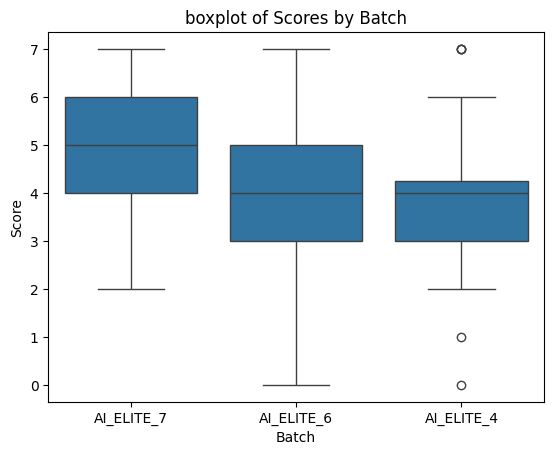

In [18]:
sns.boxplot(x='Batch',y='Score',data=df)
# sns.barplot(x='Batch',y='Score',data=df)
plt.title("boxplot of Scores by Batch")
plt.show()

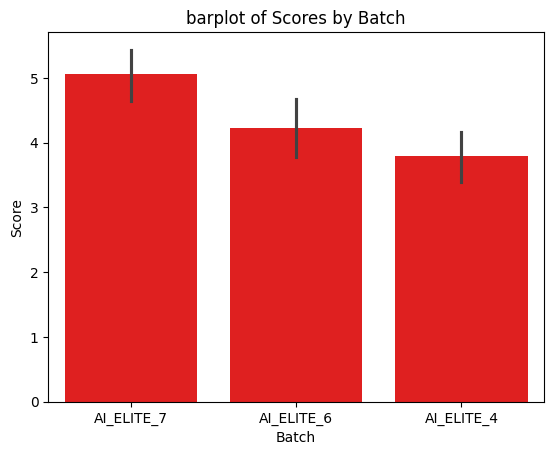

In [19]:
sns.barplot(x='Batch',y='Score',data=df,color='red')
plt.title("barplot of Scores by Batch")
plt.show()

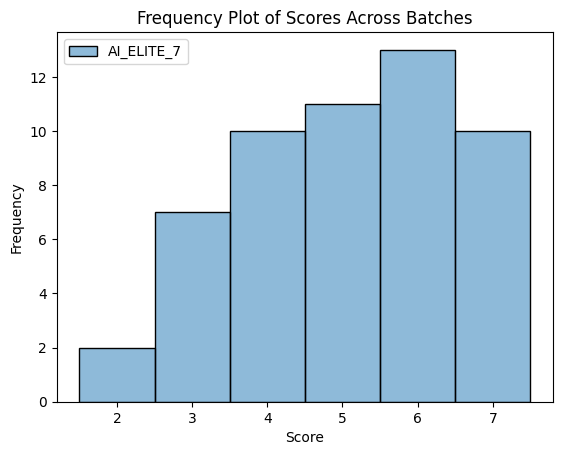

In [20]:
sns.histplot(b_7, bins=8, color="skyblue", label="AI_ELITE_7", discrete=True)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Scores Across Batches")
plt.legend()
plt.show()


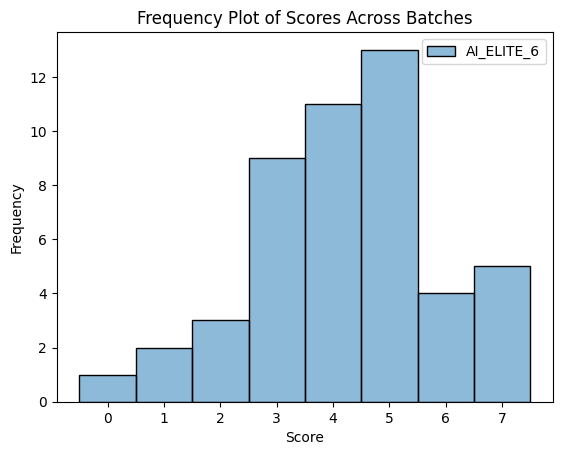

In [21]:
sns.histplot(b_6, bins=8, color="green", label="AI_ELITE_6", discrete=True)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Frequency Plot of Scores Across Batches")
plt.legend()

plt.show()


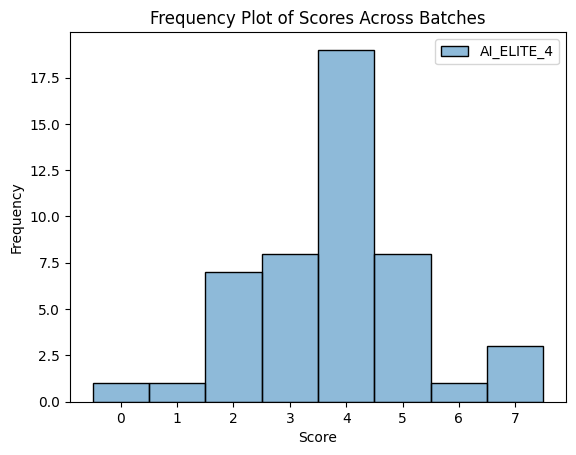

In [22]:

sns.histplot(b_4, bins=8, color="red", label="AI_ELITE_4", discrete=True)

plt.xlabel("Score")

plt.ylabel("Frequency")
plt.title("Frequency Plot of Scores Across Batches")
plt.legend()
plt.show()


# What the Charts Show
### 1. Bar Chart (Average Scores):
- AI_ELITE_7 clearly leads with the highest average (~5.2/7).
- AI_ELITE_6 sits in the middle (~4.3/7).
- AI_ELITE_4 trails behind (~3.8/7).
### 2. Box Plot (Score Distribution):
- Batch 7’s scores are tightly clustered at the higher end, showing consistency.
- Batch 6 has a wider spread — some top scorers but also several very low performers.
- Batch 4’s distribution is skewed toward the lower end, with fewer standout scores.
### 3. Histograms (Frequency of Scores):
- Batch 7: Peaks at 6 and 7, showing strong performance.
- Batch 6: Mixed peaks at 4–5, but also noticeable dips at 0–2.
- Batch 4: Heavy clustering around 3–4, with fewer high achievers.
### # Insights from Visualization
- Batch 7 is the strongest — consistent high scores and many top performers.
- Batch 6 is polarized — some excellent students, but many struggling.
- Batch 4 needs support — most students are stuck in the mid-low range, with limited high achievers.
